In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Separate Protein IDs with Q-value and Score

In [18]:
#read the CSV file into a dataframe. 
df= pd.read_csv('pG_classic_no_grouping_no_remap.csv')

#select the column you want to keep
columns_to_keep = ['Protein IDs', 'Q-value', 'Score']
new_df= df[columns_to_keep]
print(new_df)

#print(new_df)
new_df.to_csv('ProteinIDs_classic_no_grouping_no_remapwithScore.csv', index= False)

                      Protein IDs   Q-value      Score
0            sp|P35527|K1C9_HUMAN  0.000535  18.661526
1            sp|P35908|K22E_HUMAN  0.000535  17.132790
2           sp|P67809|YBOX1_HUMAN  0.000535  16.793147
3           sp|P09972|ALDOC_HUMAN  0.000535  16.784376
4           sp|P14550|AK1A1_HUMAN  0.000535  15.734628
...                           ...       ...        ...
55581      sp|Q9HD23-2|MRS2_HUMAN  1.060459   0.000000
55582    sR|single_ribo2783_HUMAN  1.060459   0.000000
55583   REV__sp|O14598|VCY1_HUMAN  1.060496   0.000000
55584     REV__sR|single_ribo3311  1.060533   0.000000
55585  REV__sp|Q9NY25|CLC5A_HUMAN  1.060570   0.000000

[55586 rows x 3 columns]


In [19]:
df = pd.read_csv('ProteinIDs_classic_no_grouping_no_remapwithScore.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame, the new columns, and the 'Score' column
new_df = pd.concat([df['Q-value'], split_col, df['Score']], axis=1)
# Print the new dataframe
print(new_df)
new_df.to_csv('SeparateProteinIDs_classic_no_grouping_no_remapwithScore.csv')

        Q-value Protein Type        Protein Uniprot Protein Label      Score
0      0.000535           sp                 P35527    K1C9_HUMAN  18.661526
1      0.000535           sp                 P35908    K22E_HUMAN  17.132790
2      0.000535           sp                 P67809   YBOX1_HUMAN  16.793147
3      0.000535           sp                 P09972   ALDOC_HUMAN  16.784376
4      0.000535           sp                 P14550   AK1A1_HUMAN  15.734628
...         ...          ...                    ...           ...        ...
55581  1.060459           sp               Q9HD23-2    MRS2_HUMAN   0.000000
55582  1.060459           sR  single_ribo2783_HUMAN          None   0.000000
55583  1.060496      REV__sp                 O14598    VCY1_HUMAN   0.000000
55584  1.060533      REV__sR        single_ribo3311          None   0.000000
55585  1.060570      REV__sp                 Q9NY25   CLC5A_HUMAN   0.000000

[55586 rows x 5 columns]


In [22]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remapwithScore.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv', index=False)

       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0               0  0.000535           sp          P35527    K1C9_HUMAN   
1            4183  0.042331      REV__sp          P35527    K1C9_HUMAN   
2               1  0.000535           sp          P35908    K22E_HUMAN   
3            4789  0.111060      REV__sp          P35908    K22E_HUMAN   
4               2  0.000535           sp          P67809   YBOX1_HUMAN   
...           ...       ...          ...             ...           ...   
28882       55553  1.060446           sp      A0A494C0Y3   F246A_HUMAN   
28883       55561  1.060459      REV__sp          Q9P0W8   SPAT7_HUMAN   
28884       55569  1.060459           sp          Q15051   IQCB1_HUMAN   
28885       55578  1.060459      REV__sp          Q92793     CBP_HUMAN   
28886       55580  1.060459      REV__sp      A0A096LP01   SIM26_HUMAN   

           Score                                      Protein names  Length  \
0      18.661526  Keratin, type 

In [48]:
import pandas as pd

# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remapwithScore.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot', how='outer', indicator=True)

# check which rows are not merged
not_merged = merged_csv.loc[merged_csv['_merge'] == 'left_only']
print("The following rows from csv1 were not merged: ")
print(not_merged)

# check if discarded rows from the merged dataframe
#discarded_rows = merged_csv.loc[merged_csv['_merge'] == 'right_only']
#print("The following rows from csv2 were discarded in the merge: ")
#print(discarded_rows)

#save not merged rows into a file. 
not_merged.to_csv('MissingUniPROTClassicNoGroupingNoRemapwithScore.csv', index= False)

The following rows from csv1 were not merged: 
       Unnamed: 0   Q-value Protein Type        Protein Uniprot Protein Label  \
369         187.0  0.000535           sp               O94925-3    GLSK_HUMAN   
370        4449.0  0.071996      REV__sp               O94925-3    GLSK_HUMAN   
383         194.0  0.000535           sp                 P00698    LYSC_CHICK   
384       33132.0  0.965955      REV__sp                 P00698    LYSC_CHICK   
574         291.0  0.000535           sp                 P00761      TRYP_PIG   
...           ...       ...          ...                    ...           ...   
55579     55575.0  1.060459      REV__sp               Q9NXR8-2    ING3_HUMAN   
55580     55576.0  1.060459      REV__sp               Q8NDD1-7   CA131_HUMAN   
55581     55577.0  1.060459           pI   c1riboseqorf31_HUMAN           NaN   
55584     55582.0  1.060459           sR  single_ribo2783_HUMAN           NaN   
55585     55584.0  1.060533      REV__sR        single_ribo331

In [49]:
# Read in the csv file
data = pd.read_csv("MissingUniPROTClassicNoGroupingNoRemapwithScore.csv")

# Fill any missing values in the "Protein Label" column with "MISSING"
data["Protein Label"].fillna("MISSING", inplace=True)

# Filter the rows where "HUMAN" is in the "Protein Label" column
human_data = data[data["Protein Label"].str.contains("HUMAN")]

# Print the resulting data
print(human_data)


       Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0           187.0  0.000535           sp        O94925-3    GLSK_HUMAN   
1          4449.0  0.071996      REV__sp        O94925-3    GLSK_HUMAN   
14          612.0  0.000535           sp        P14618-2    KPYM_HUMAN   
15        53254.0  1.055412      REV__sp        P14618-2    KPYM_HUMAN   
17          735.0  0.000535           sp        P50851-2    LRBA_HUMAN   
...           ...       ...          ...             ...           ...   
26686     55556.0  1.060446           sp        P00387-2   NB5R3_HUMAN   
26689     55567.0  1.060459      REV__sp        Q9NSC5-4   HOME3_HUMAN   
26693     55573.0  1.060459           sp        P10747-2    CD28_HUMAN   
26694     55575.0  1.060459      REV__sp        Q9NXR8-2    ING3_HUMAN   
26695     55576.0  1.060459      REV__sp        Q8NDD1-7   CA131_HUMAN   

           Score  Protein names  Length  Mass     _merge  
0      10.215956            NaN     NaN   NaN  left_

# Protein Label which are not human 

In [50]:
# Fill any missing values in the "Protein Label" column with "MISSING"
data["Protein Label"].fillna("MISSING", inplace=True)

# Filter the rows where "HUMAN" is NOT in the "Protein Label" column
not_human_data = data[~data["Protein Label"].str.contains("HUMAN")]

# Print the resulting data
print(not_human_data)
not_human_data.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemapwithScore(NOTHUMANDATA).csv', index=False)


       Unnamed: 0   Q-value Protein Type        Protein Uniprot Protein Label  \
2           194.0  0.000535           sp                 P00698    LYSC_CHICK   
3         33132.0  0.965955      REV__sp                 P00698    LYSC_CHICK   
4           291.0  0.000535           sp                 P00761      TRYP_PIG   
5         33305.0  0.966873      REV__sp                 P00761      TRYP_PIG   
6           387.0  0.000535           sp                 P02769    ALBU_BOVIN   
...           ...       ...          ...                    ...           ...   
26691     55571.0  1.060459      REV__nC           near_cogn_78       MISSING   
26692     55572.0  1.060459           sR  single_ribo1192_HUMAN       MISSING   
26696     55577.0  1.060459           pI   c1riboseqorf31_HUMAN       MISSING   
26697     55582.0  1.060459           sR  single_ribo2783_HUMAN       MISSING   
26698     55584.0  1.060533      REV__sR        single_ribo3311       MISSING   

           Score  Protein n

In [51]:
# Read in the csv file
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore(NOTHUMANDATA).csv")

# Filter the rows where "HUMAN" is in the "Protein Label" column
missing_data = data[data["Protein Label"].str.contains("MISSING")]

# Print the resulting data
print(missing_data)

       Unnamed: 0   Q-value Protein Type        Protein Uniprot Protein Label  \
37         3498.0  0.003136      REV__pI        c10riboseqorf99       MISSING   
38         3666.0  0.007629      REV__pI        c22riboseqorf46       MISSING   
39         3719.0  0.008644      REV__sR         single_ribo502       MISSING   
42         3776.0  0.010687           sR   single_ribo728_HUMAN       MISSING   
43         3854.0  0.014196           pI  c11riboseqorf78_HUMAN       MISSING   
...           ...       ...          ...                    ...           ...   
10907     55571.0  1.060459      REV__nC           near_cogn_78       MISSING   
10908     55572.0  1.060459           sR  single_ribo1192_HUMAN       MISSING   
10909     55577.0  1.060459           pI   c1riboseqorf31_HUMAN       MISSING   
10910     55582.0  1.060459           sR  single_ribo2783_HUMAN       MISSING   
10911     55584.0  1.060533      REV__sR        single_ribo3311       MISSING   

          Score  Protein na

In [52]:
# Fill any missing values in the "Protein Label" column with "MISSING"
data["Protein Label"].fillna("MISSING", inplace=True)

# Filter the rows where "HUMAN" is NOT in the "Protein Label" column
other_animal_data = data[~data["Protein Label"].str.contains("MISSING")]

# Print the resulting data
print(other_animal_data)

      Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0          194.0  0.000535           sp          P00698    LYSC_CHICK   
1        33132.0  0.965955      REV__sp          P00698    LYSC_CHICK   
2          291.0  0.000535           sp          P00761      TRYP_PIG   
3        33305.0  0.966873      REV__sp          P00761      TRYP_PIG   
4          387.0  0.000535           sp          P02769    ALBU_BOVIN   
...          ...       ...          ...             ...           ...   
6715     38727.0  1.004036      REV__sp          P02439   KRB2B_SHEEP   
6716     42492.0  1.022926           sp          P02439   KRB2B_SHEEP   
6922     39556.0  1.008069           sp          P00791      PEPA_PIG   
6923     49331.0  1.044165      REV__sp          P00791      PEPA_PIG   
7683     42681.0  1.022926      REV__sp          P00767    CTRB_BOVIN   

          Score  Protein names  Length  Mass     _merge  
0     10.129848            NaN     NaN   NaN  left_only  
1      

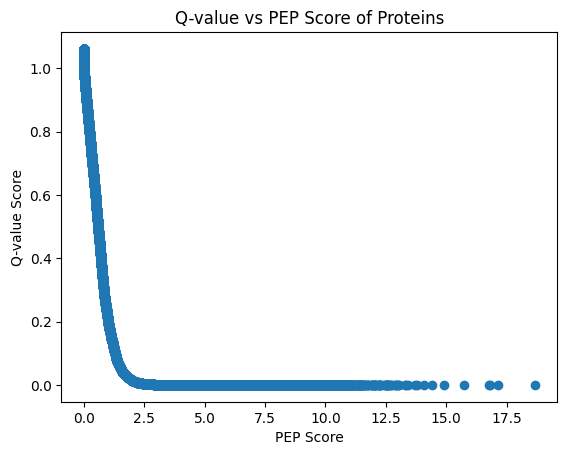

In [23]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs PEP Score of Proteins')
plt.xlabel("PEP Score")
plt.ylabel("Q-value Score")
plt.show()

In [24]:
df = pd.read_csv('MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

print(df_filtered)
df_filtered.to_csv('MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilterwithScore.csv', index=False)

      Unnamed: 0   Q-value Protein Type Protein Uniprot Protein Label  \
0              0  0.000535           sp          P35527    K1C9_HUMAN   
2              1  0.000535           sp          P35908    K22E_HUMAN   
4              2  0.000535           sp          P67809   YBOX1_HUMAN   
6              3  0.000535           sp          P09972   ALDOC_HUMAN   
8              4  0.000535           sp          P14550   AK1A1_HUMAN   
...          ...       ...          ...             ...           ...   
6957        3764  0.009378           sp          Q9H5K3   SG196_HUMAN   
6959        3765  0.009644      REV__sp          A6NL88   SHSA7_HUMAN   
6961        3766  0.009644           sp          Q8N6Q8   MET25_HUMAN   
6963        3768  0.009906           sp          Q5SXM2   SNPC4_HUMAN   
6965        3769  0.009906           sp          Q0VF96   CGNL1_HUMAN   

          Score                                      Protein names  Length  \
0     18.661526  Keratin, type I cytoskeletal

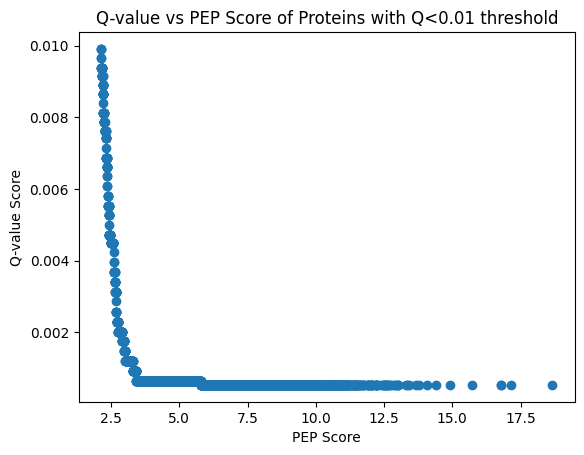

In [25]:
# Load the merged CSV file into a pandas DataFrame
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapQ-valuefilterwithScore.csv")

# Create a scatter plot of q-value vs length
plt.scatter(data["Score"], data["Q-value"])
plt.title('Q-value vs PEP Score of Proteins with Q<0.01 threshold')
plt.xlabel("PEP Score")
plt.ylabel("Q-value Score")
plt.show()

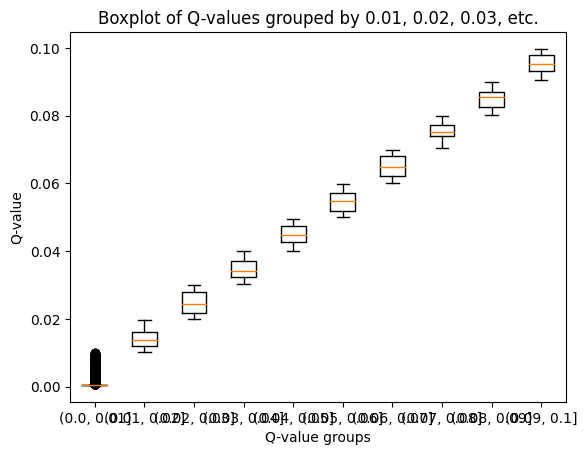

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# create bins based on the q-value column
bins = pd.cut(df['Q-value'], bins=[0.01*i for i in range(11)])

# group the q-values by the bins
groups = df.groupby(bins)['Q-value']

# create a boxplot of the q-values for each group
fig, ax = plt.subplots()
ax.boxplot([group[1] for group in groups], labels=[str(group[0]) for group in groups])
ax.set_xlabel('Q-value groups')
ax.set_ylabel('Q-value')
ax.set_title('Boxplot of Q-values grouped by 0.01, 0.02, 0.03, etc.')
plt.show()

In [27]:
import csv

# open the CSV file
with open('MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv', 'r') as file:
    reader = csv.reader(file)
    # skip header row
    next(reader)
    # initialize max_q to negative infinity
    max_q = float('-inf')
    # loop through each row in the file
    for row in reader:
        # extract the Q-value from the row
        q_value = float(row[1])
        # update max_q if necessary
        if q_value > max_q:
            max_q = q_value

print("The highest Q-value in the file is:", max_q)

The highest Q-value in the file is: 1.060570115


/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/3785914092.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


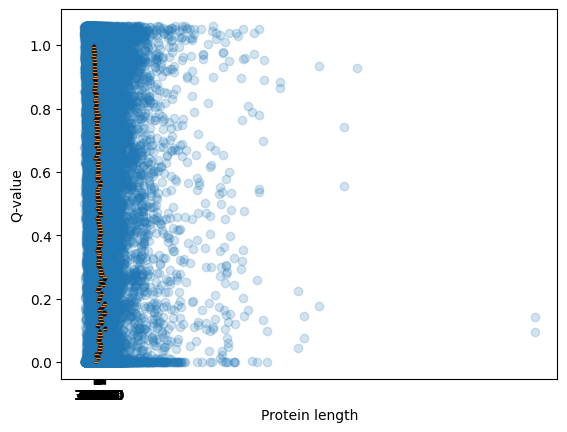

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# group q-values by 0.01 and calculate the median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# create a scatter plot with protein length on x-axis and q-value on y-axis
plt.scatter(df['Length'], df['Q-value'], alpha=0.2)

# add a boxplot for each group of q-values and the corresponding median protein length
plt.boxplot([df[df['Q-value'].between(q.left, q.right)]['Q-value'] for q in df_grouped.index],
            positions=df_grouped['Length'], widths=100, showfliers=False)

# set x-axis and y-axis labels
plt.xlabel('Protein length')
plt.ylabel('Q-value')

# show the plot
plt.show()

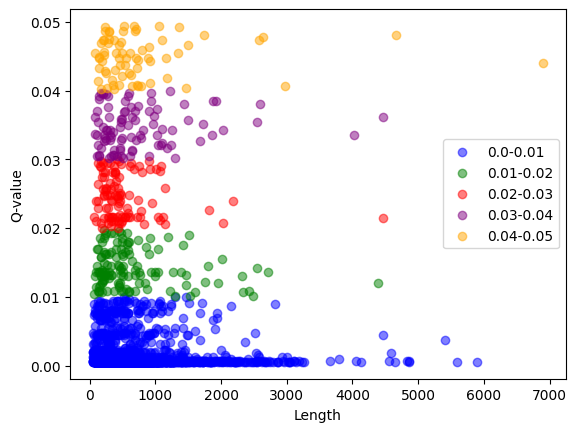

In [29]:
# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# group proteins by Q-value
qvalue_groups = df.groupby(pd.cut(df['Q-value'], bins=[0, 0.01, 0.02, 0.03, 0.04, 0.05]))

# plot a scatter plot of protein length vs Q-value for each group
fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, (group_name, group_df) in enumerate(qvalue_groups):
    ax.scatter(group_df['Length'], group_df['Q-value'], color=colors[i], alpha=0.5, label=f'{group_name.left}-{group_name.right}')
    
# add a legend, x-axis label, and y-axis label
ax.legend()
ax.set_xlabel('Length')
ax.set_ylabel('Q-value')

# show the plot
plt.show()

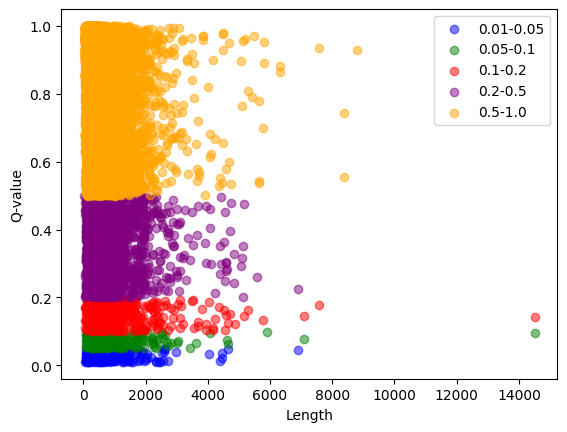

In [30]:
# read csv file into a dataframe

# group proteins by Q-value
qvalue_groups = df.groupby(pd.cut(df['Q-value'], bins=[0.01, 0.05, 0.10, 0.20, 0.50, 1.00]))

# plot a scatter plot of protein length vs Q-value for each group
fig, ax = plt.subplots()
colors = ['blue', 'green', 'red', 'purple', 'orange']
for i, (group_name, group_df) in enumerate(qvalue_groups):
    ax.scatter(group_df['Length'], group_df['Q-value'], color=colors[i], alpha=0.5, label=f'{group_name.left}-{group_name.right}')
    
# add a legend, x-axis label, and y-axis label
ax.legend()
ax.set_xlabel('Length')
ax.set_ylabel('Q-value')

# show the plot
plt.show()

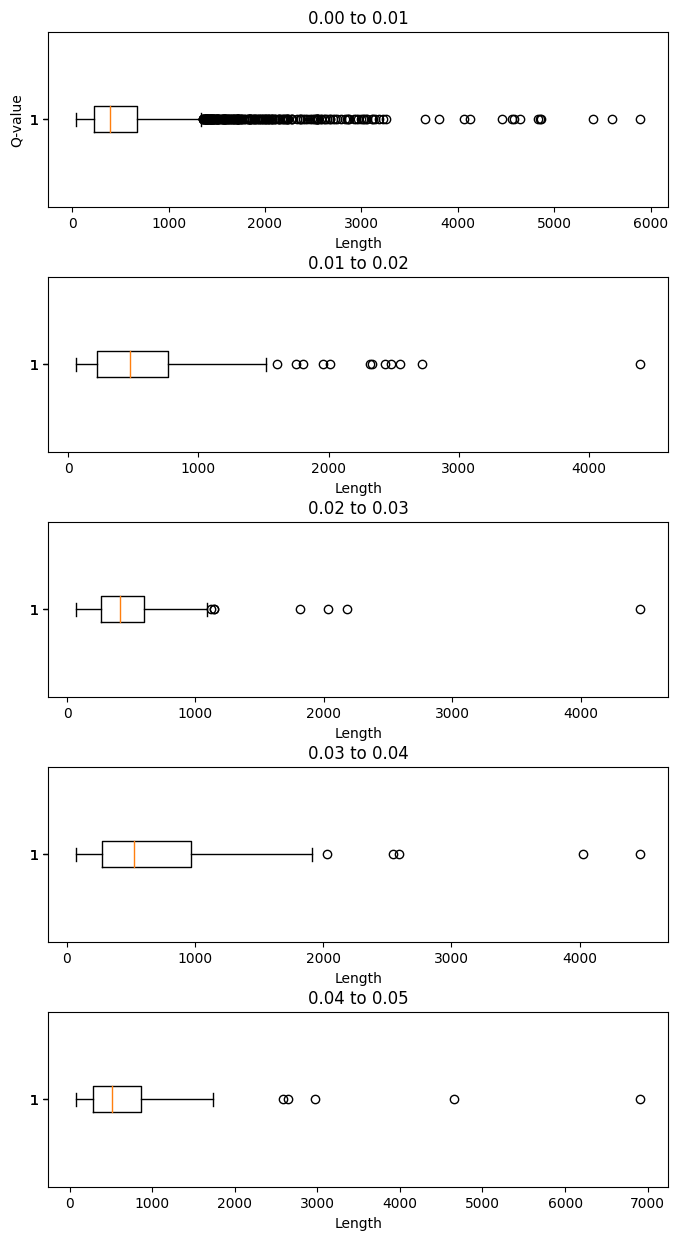

In [31]:
# read csv file into a dataframe
# group proteins by Q-value
qvalue_groups = data.groupby(pd.cut(data['Q-value'], bins=[0, 0.01, 0.02, 0.03, 0.04, 0.05]))

# create 5 separate boxplot graphs to compare the length of protein and q-value groups
fig, axes = plt.subplots(nrows=5, ncols=1, figsize=(8, 15), sharey=True)

# loop over each group and create a boxplot
for i, (group_name, group_df) in enumerate(qvalue_groups):
    ax = axes[i]
    ax.boxplot(group_df['Length'], vert=False)
    ax.set_title(f"{group_name.left:.2f} to {group_name.right:.2f}")
    ax.set_xlabel('Length')
    if i == 0:
        ax.set_ylabel('Q-value')

# adjust spacing and show the plot
plt.subplots_adjust(hspace=0.4)
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/4151491855.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


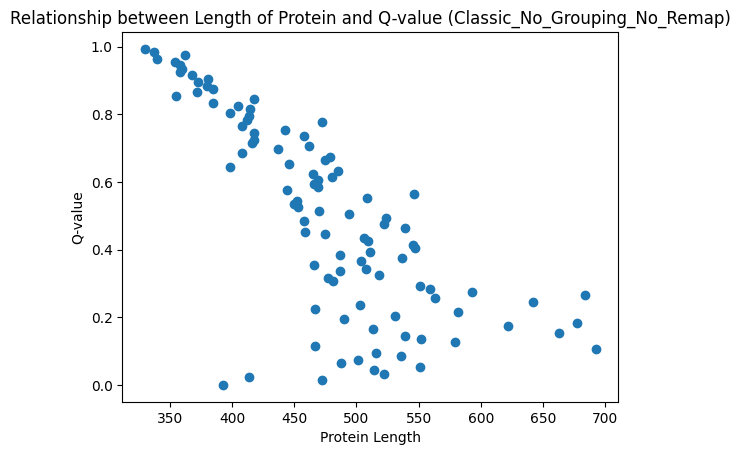

In [33]:

import numpy as np

# read csv file into a dataframe
# group proteins by q-values and calculate median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# plot the median protein length vs q-value
plt.scatter(df_grouped['Length'], df_grouped['Q-value'])

# set axis labels
plt.xlabel('Protein Length')
plt.ylabel('Q-value')
plt.title('Relationship between Length of Protein and Q-value (Classic_No_Grouping_No_Remap)')
# show the plot
plt.show()

# Boxplot so divide the proteins into 5-10 groups of Q-values and show by boxplot the length distribution 

<Figure size 1000x600 with 0 Axes>

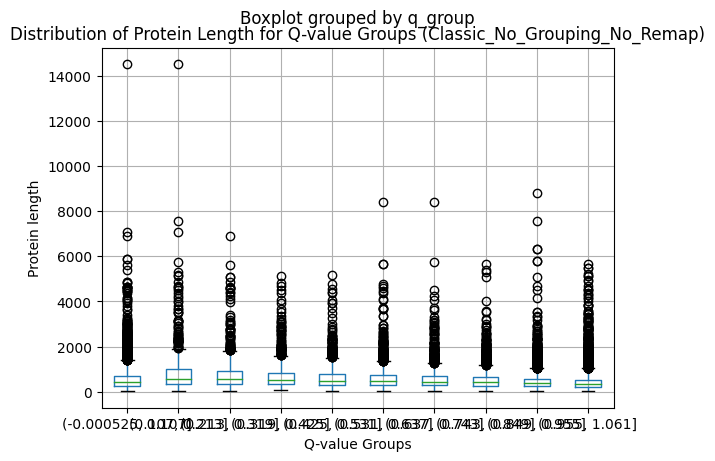

In [46]:

# create 10 groups of proteins based on Q-values
data['q_group'] = pd.cut(data['Q-value'], bins=10)


plt.figure(figsize=(10, 6))
# create a boxplot of protein length for each Q-value group
data.boxplot(column='Length', by='q_group')

# set axis labels and title
plt.xlabel('Q-value Groups')
plt.ylabel('Protein length')
plt.title('Distribution of Protein Length for Q-value Groups (Classic_No_Grouping_No_Remap)')
#plt.xlim(left=-1, right=10)
#plt.ylim(left=-2, right=15)

# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/1620547090.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered['q_group'] = pd.cut(data_filtered['Q-value'], bins=10)


<Figure size 1000x600 with 0 Axes>

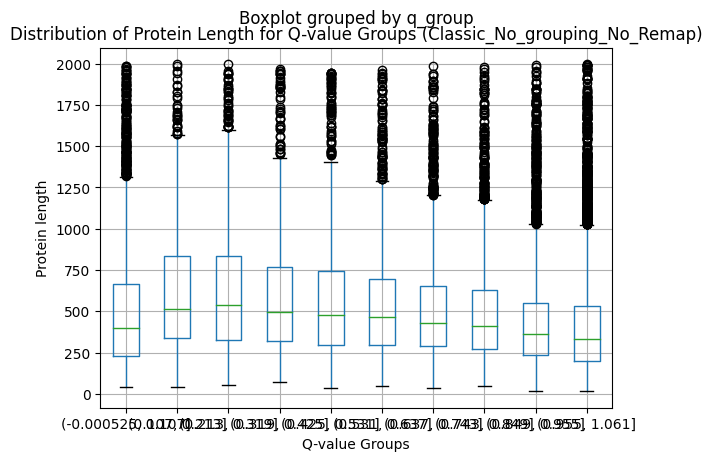

In [47]:
# Filter data for protein length values between 0 and 2000
data_filtered = data[(data['Length'] >= 0) & (data['Length'] <= 2000)]

# create 10 groups of proteins based on Q-values
data_filtered['q_group'] = pd.cut(data_filtered['Q-value'], bins=10)

plt.figure(figsize=(10, 6))
# create a boxplot of protein length for each Q-value group
data_filtered.boxplot(column='Length', by='q_group')

# set axis labels and title
plt.xlabel('Q-value Groups')
plt.ylabel('Protein length')
plt.title('Distribution of Protein Length for Q-value Groups (Classic_No_grouping_No_Remap)')

# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/2461945753.py:9: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()


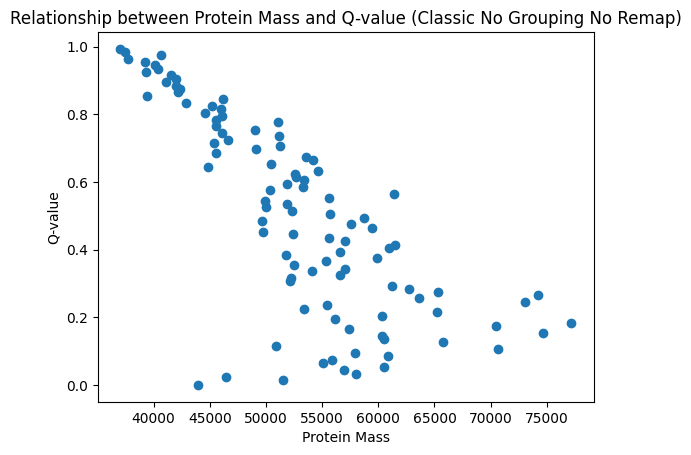

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# read csv file into a dataframe
data = pd.read_csv("MergedHumanProteome-ClassicNoGroupingNoRemapwithScore.csv")

# group proteins by q-values and calculate median protein length for each group
df_grouped = df.groupby(pd.cut(df['Q-value'], bins=np.arange(0, 1.01, 0.01))).median()

# plot the median protein length vs q-value
plt.scatter(df_grouped['Mass'], df_grouped['Q-value'])

# set axis labels
plt.xlabel('Protein Mass')
plt.ylabel('Q-value')
plt.title('Relationship between Protein Mass and Q-value (Classic No Grouping No Remap)')
# show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/119774980.py:7: UserWarning: 

`shade_lowest` has been replaced by `thresh`; setting `thresh=0.05.
This will become an error in seaborn v0.13.0; please update your code.

  sns.kdeplot(data=data, x='Mass', y='Q-value', shade=True, cmap='Blues', shade_lowest=False)
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/119774980.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data, x='Mass', y='Q-value', shade=True, cmap='Blues', shade_lowest=False)


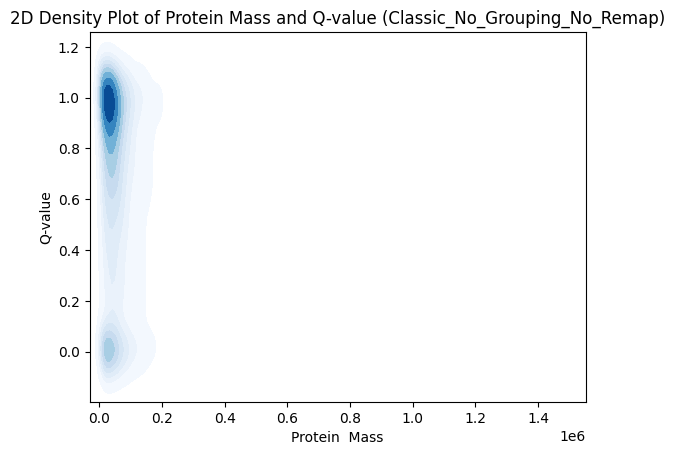

In [41]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data from CSV file
# Create a 2D density plot of protein mass and Q-value
sns.kdeplot(data=data, x='Mass', y='Q-value', shade=True, cmap='Blues', shade_lowest=False)

# Set axis labels and title
plt.xlabel('Protein  Mass')
plt.ylabel('Q-value')
plt.title('2D Density Plot of Protein Mass and Q-value (Classic_No_Grouping_No_Remap)')

# Show the plot
plt.show()

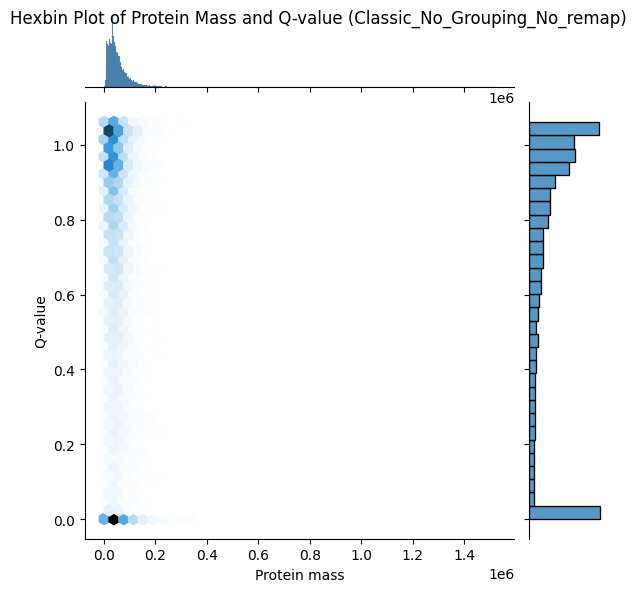

In [38]:
# Create a hexbin plot of protein mass and Q-value
sns.jointplot(data=data, x='Mass', y='Q-value', kind='hex')

# Set axis labels and title
plt.xlabel('Protein mass')
plt.ylabel('Q-value')
plt.suptitle('Hexbin Plot of Protein Mass and Q-value (Classic_No_Grouping_No_remap)', fontsize=12)

# Show the plot
plt.show()

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/686218680.py:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=data_filtered, x='Mass', y='Q-value', cmap='Blues', shade=True, thresh=0.05)


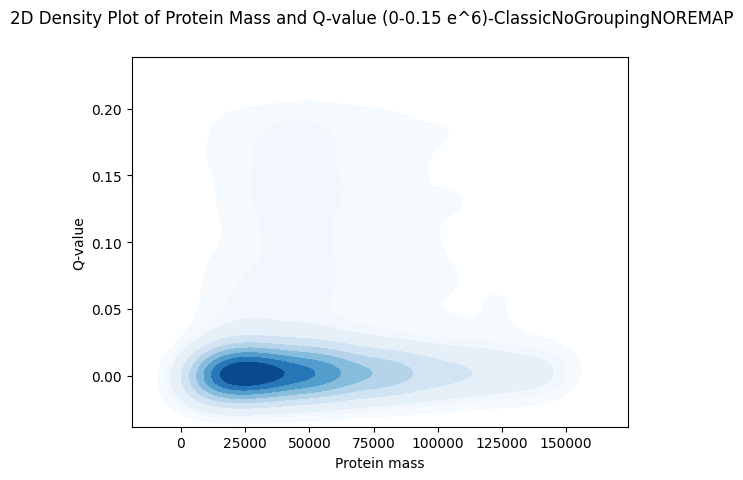

In [45]:
# Filter data for mass values between 0 and 0.3 e^6
data_filtered = data[(data['Mass'] >= 0) & (data['Mass'] <= 0.15e6) & (data['Q-value'] >= 0.0) & (data['Q-value'] <= 0.2)]
# Create a 2D density plot of protein mass and Q-value for filtered data
sns.kdeplot(data=data_filtered, x='Mass', y='Q-value', cmap='Blues', shade=True, thresh=0.05)

# Set axis labels and title
plt.xlabel('Protein mass')
plt.ylabel('Q-value')
plt.suptitle('2D Density Plot of Protein Mass and Q-value (0-0.15 e^6)-ClassicNoGroupingNOREMAP', fontsize=12)

# Show the plot
plt.show()

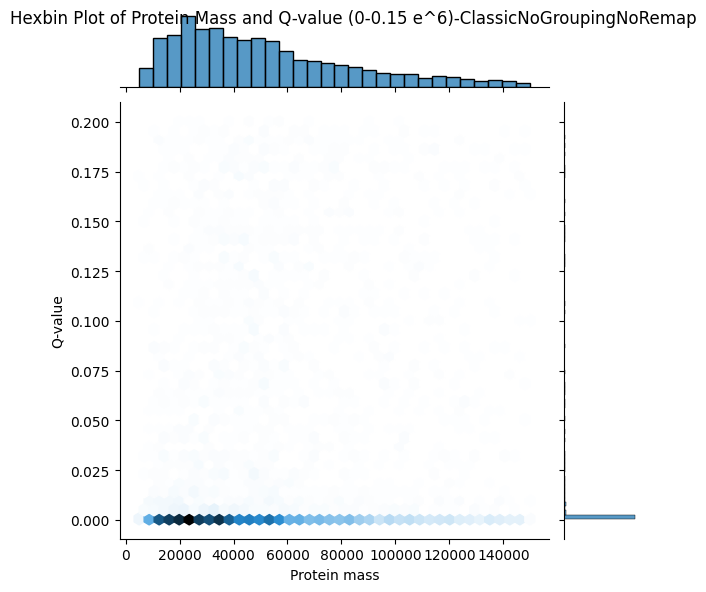

In [44]:
# Filter data for mass values between 0 and 0.3 e^6
data_filtered = data[(data['Mass'] >= 0) & (data['Mass'] <= 0.15e6) & (data['Q-value'] >= 0.0) & (data['Q-value'] <= 0.2)]

# Create a hexbin plot of protein mass and Q-value for filtered data
sns.jointplot(data=data_filtered, x='Mass', y='Q-value', kind='hex')

# Set axis labels and title
plt.xlabel('Protein mass')
plt.ylabel('Q-value')
plt.suptitle('Hexbin Plot of Protein Mass and Q-value (0-0.15 e^6)-ClassicNoGroupingNoRemap', fontsize=12)

# Show the plot
plt.show()

In [3]:
df = pd.read_csv('ProteinIDs_classic_no_grouping_no_remap.csv')

# Split the column by '|', but only keep the first two splits if there are more than 2
split_col = df['Protein IDs'].str.split('|', n=2, expand=True)

# Rename the new columns
split_col.columns = ['Protein Type', 'Protein Uniprot', 'Protein Label']

# Concatenate the original DataFrame and the new columns
new_df = pd.concat([df['Q-value'], split_col], axis=1)
print(new_df)
new_df.to_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

        Q-value Protein Type        Protein Uniprot Protein Label
0      0.000535           sp                 P35527    K1C9_HUMAN
1      0.000535           sp                 P35908    K22E_HUMAN
2      0.000535           sp                 P67809   YBOX1_HUMAN
3      0.000535           sp                 P09972   ALDOC_HUMAN
4      0.000535           sp                 P14550   AK1A1_HUMAN
...         ...          ...                    ...           ...
55581  1.060459           sp               Q9HD23-2    MRS2_HUMAN
55582  1.060459           sR  single_ribo2783_HUMAN          None
55583  1.060496      REV__sp                 O14598    VCY1_HUMAN
55584  1.060533      REV__sR        single_ribo3311          None
55585  1.060570      REV__sp                 Q9NY25   CLC5A_HUMAN

[55586 rows x 4 columns]


In [ ]:
# read in the two csv files
csv1 = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')
csv2 = pd.read_csv('UniprotHumanProteome.csv')

# merge the two csv files on a common column
merged_csv = pd.merge(csv1, csv2, on='Protein Uniprot')

print(merged_csv)
# save the merged csv to a file
merged_csv.to_csv('MergedHumanProteome-SavitskiNoRemapwithScore.csv', index=False)

REV__sp    23177
sp         21577
REV__sR     2714
sR          2665
REV__pI     2123
pI          2105
sU           441
REV__sU      427
nC           188
REV__nC      169
Name: Protein Type, dtype: int64


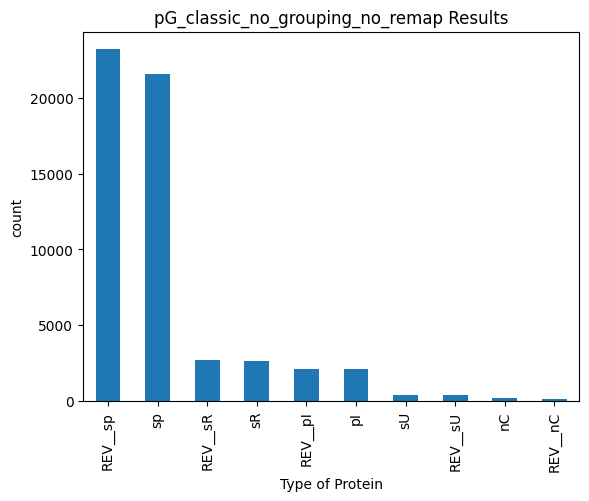

In [13]:
# Load the CSV file into a pandas DataFrame
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# Count the number of occurrences of each unique string in the 'Column 1' column
value_counts = df['Protein Type'].value_counts()

# Print the value counts
print(value_counts)

# Plot the value counts as a bar chart
value_counts.plot(kind='bar')
plt.title('pG_classic_no_grouping_no_remap Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
plt.show()

Protein Type
REV__pI       2
REV__sR       1
REV__sp      33
sp         3734
Name: Protein Type, dtype: int64


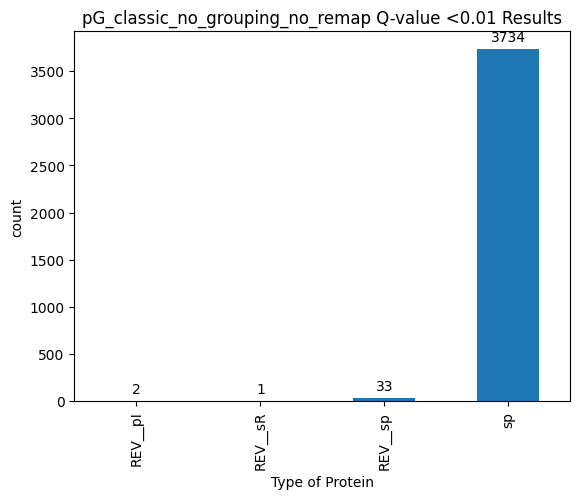

In [17]:
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# filter for Q-value < 0.01
df_filtered = df[df['Q-value'] < 0.01]

# group by protein type and count the number of each type
protein_count = df_filtered.groupby('Protein Type')['Protein Type'].count()

# print the protein count
print(protein_count)

# Plot the value counts as a bar chart
protein_count.plot(kind='bar')
plt.title('pG_classic_no_grouping_no_remap Q-value <0.01 Results')
plt.xlabel('Type of Protein')
plt.ylabel('count')
# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()
          
          

In [6]:
# filter for Q-value >= 0.01
df_above_cutoff = df[df['Q-value'] >= 0.01]

# group by protein type and count the number of each type above the Q-value cutoff
protein_count_above = df_above_cutoff.groupby('Protein Type')['Protein Type'].count()

# print the protein counts
print("Protein count below Q-value cutoff:")
print(protein_count)
print("\nProtein count above Q-value cutoff:")
print(protein_count_above)

Protein count below Q-value cutoff:
Protein Type
REV__pI       2
REV__sR       1
REV__sp      33
sp         3734
Name: Protein Type, dtype: int64

Protein count above Q-value cutoff:
Protein Type
REV__nC      169
REV__pI     2121
REV__sR     2713
REV__sU      427
REV__sp    23144
nC           188
pI          2105
sR          2665
sU           441
sp         17843
Name: Protein Type, dtype: int64


# Q-value filter CUTOFF <0.01

/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/3066059785.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')
/var/folders/bt/n98c3tq15s3d6866b0l_z_400000gn/T/ipykernel_27967/3066059785.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp'

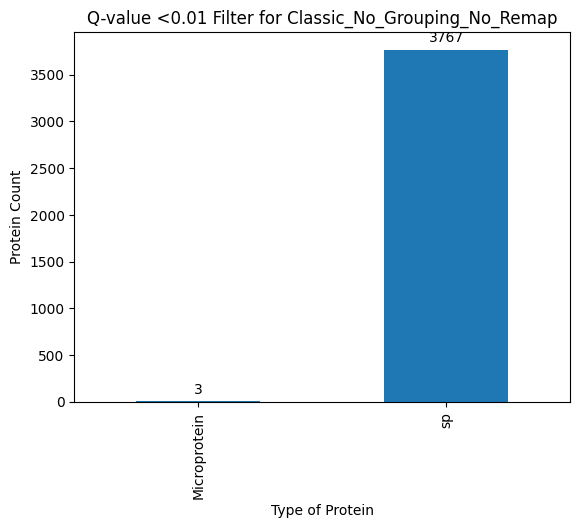

In [11]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# filter for Q-value < 0.01
df_below_cutoff = df[df['Q-value'] < 0.01]

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['REV__pI', 'REV__sR','REV__nC', 'REV__sU', 'pI', 'sR', 'nC','sU'], 'Microprotein')

# combine counts for sp and REV__sp as 'sp'
df_below_cutoff['Protein Type'] = df_below_cutoff['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type below the Q-value cutoff
protein_count_below = df_below_cutoff.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count_below.plot(kind='bar')
plt.title('Q-value <0.01 Filter for Classic_No_Grouping_No_Remap')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')
# add labels to the bars
for i, count in enumerate(protein_count_below):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

# No Q-value Filter

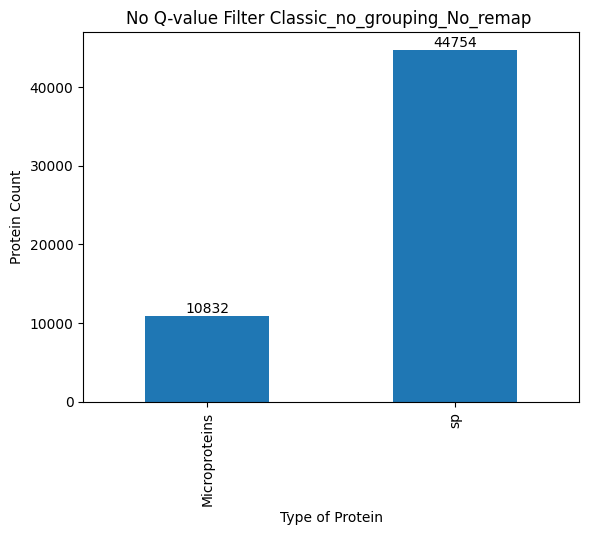

In [16]:
# read in the CSV file with the separated protein IDs
df = pd.read_csv('SeparateProteinIDs_classic_no_grouping_no_remap.csv')

# combine counts for REV__pI, REV__sR, REV__nC, REV__sU, pI, sR, nC, sU as 'microproteins'
df['Protein Type'] = df['Protein Type'].replace(['REV__pI', 'REV__sR', 'REV__nC', 'REV__sU', 'pI', 'sR', 'nC', 'sU'], 'Microproteins')

# combine counts for sp and REV__sp as 'sp'
df['Protein Type'] = df['Protein Type'].replace(['sp', 'REV__sp'], 'sp')

# group by protein type and count the number of each type
protein_count = df.groupby('Protein Type')['Protein Type'].count()

# plot the histogram
protein_count.plot(kind='bar')
plt.title('No Q-value Filter Classic_no_grouping_No_remap ')
plt.xlabel('Type of Protein')
plt.ylabel('Protein Count')

# add labels to the bars
for i, count in enumerate(protein_count):
    plt.text(i, count + 50, str(count), ha='center', va='bottom')

plt.show()

In [ ]:
from sklearn.svm import LinearSVC
from sklearn.datasets import load_svmlight_file
from sklearn.model_selection import train_test_split

# Load the training data in SVMLight format
X_train, y_train = load_svmlight_file("training_data.txt")

# Split the training data into a training set and a validation set
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

# Train a linear SVM model using pairwise ranking loss
svm = LinearSVC(loss="hinge")
svm.fit(X_train, y_train)

# Evaluate the model on the validation set
score = svm.score(X_val, y_val)
print("Validation set accuracy:", score)